# importing Library

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import joblib
from tkinter import *
from tkinter import messagebox

# Importing CSV To Python

In [3]:
df = pd.read_csv('Admission Chance.csv')
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No          400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4    SOP               400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


,Serial No,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


# Check For Missing Value

In [4]:
df.isna().sum()

Serial No            0
GRE Score            0
TOEFL Score          0
University Rating    0
 SOP                 0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

# Check Heat Map

<Axes: >

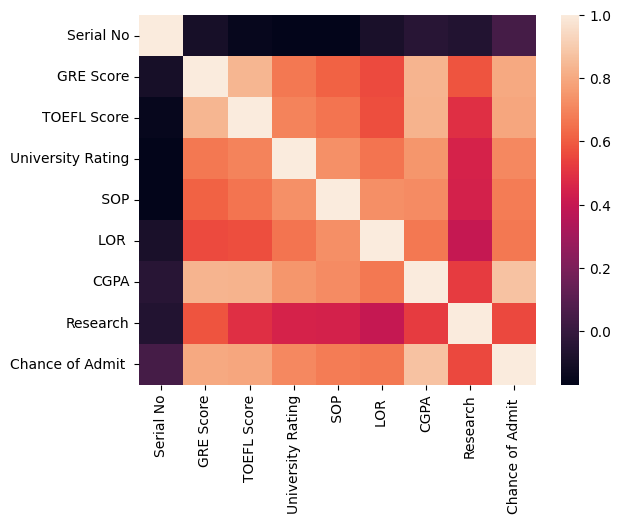

In [5]:
sns.heatmap(df.corr())

# Drop Data With No Correlation

In [6]:
df = df.drop(['Serial No'], axis = 1)

# Standarisasi

In [7]:
X = df.drop(['Chance of Admit '], axis= 1)
y = df['Chance of Admit '] 
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X) 
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


# Data Splitting

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training (Regression)

In [9]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

svm = SVR()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

gr = GradientBoostingRegressor()
gr.fit(X_train, y_train)
y_pred_gr = gr.predict(X_test)


# Evaluate Model (Regression)

In [10]:
Score_lr = metrics.r2_score(y_test,y_pred_lr)
Score_svr = metrics.r2_score(y_test,y_pred_svm)
Score_rf = metrics.r2_score(y_test,y_pred_rf)
Score_gr = metrics.r2_score(y_test,y_pred_gr)

In [11]:
final_data = pd.DataFrame({'Models': ['LR', 'SVR', 'RF', 'GR'], 'R2_SCORE': [Score_lr, Score_svr, Score_rf, Score_gr]})
final_data

,Models,R2_SCORE
0,LR,0.821208
1,SVR,0.760285
2,RF,0.805726
3,GR,0.796930


<Axes: xlabel='Models', ylabel='R2_SCORE'>

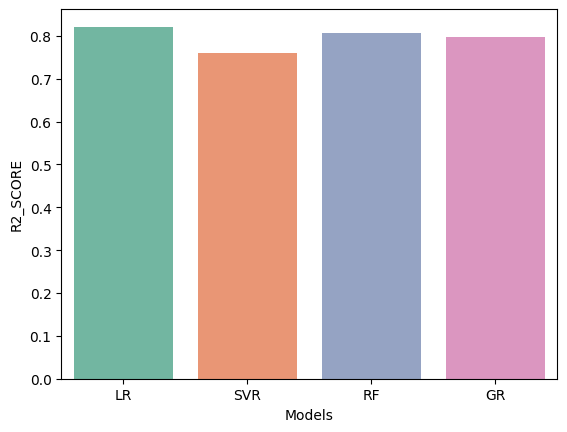

In [12]:
custom_palette = sns.color_palette("Set2", 4)

sns.barplot(x='Models', y='R2_SCORE', data=final_data, hue='Models', palette=custom_palette, legend=False)


We Can See That Linear Regression is the best model to use 

# Model Training (Clasification)

In [13]:
y_train = [1 if value>0.7 else 0 for value in y_train]
y_test = [1 if value>0.7 else 0 for value in y_test]

y_train = np.array(y_train)
y_test = np.array(y_test)

In [14]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred_1= lr.predict(X_test)

svm = SVC()
svm.fit(X_train, y_train)
y_pred_2 = svm.predict(X_test)

knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred_3 = knn.predict(X_test)

rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_4 = rf.predict(X_test)

gr = GradientBoostingClassifier()
gr.fit(X_train,y_train)
y_pred_5 = gr.predict(X_test)


# Evaluate Model (Clasification)


In [15]:
final_data = pd.DataFrame({'Models':['LR','SVC','KNN','RF','GBC'],'ACC_SCORE':[accuracy_score(y_test,y_pred_1),accuracy_score(y_test,y_pred_2),accuracy_score(y_test,y_pred_3),accuracy_score(y_test,y_pred_4),accuracy_score(y_test,y_pred_5)]})
final_data

,Models,ACC_SCORE
0,LR,0.9000
1,SVC,0.8750
2,KNN,0.8375
3,RF,0.8625
4,GBC,0.8375


<Axes: xlabel='Models', ylabel='ACC_SCORE'>

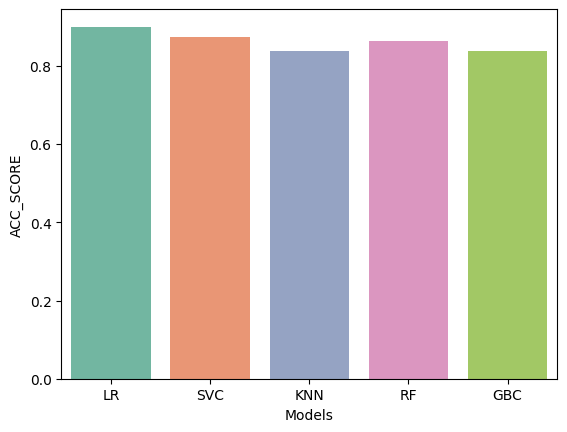

In [16]:
custom_palette = sns.color_palette("Set2", 5)

sns.barplot(x='Models', y='ACC_SCORE', data=final_data, hue='Models', palette=custom_palette, legend=False)


GBC (Gradien Boosting Clasifier) is the best model to use

# Saving Model

In [17]:
X = df.drop('Chance of Admit ',axis=1)
y = df['Chance of Admit ']
y  = [1 if value>0.7 else 0 for value in y]
y = np.array(y)
y
sc = StandardScaler()
X = sc.fit_transform(X)
gr = GradientBoostingClassifier()
gr.fit(X,y)
y

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,

In [18]:
joblib.dump(gr,'admission_model')
model = joblib.load('admission_model')
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', ' SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [19]:
model.predict(sc.transform([[337,118,4,4.5,4.5,9.65,1]]))

C:\Users\shera\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1])

# GUI

In [20]:
joblib.dump(lr,'admission_model')

['admission_model']

In [21]:
model = joblib.load('admission_model')

In [22]:
model.predict([[300,80,4,4.5,4.5,6,1]])

array([1])

In [23]:
def validate_input(event):
    entry_ranges = {
        e1: (260, 340), 
        e2: (0, 120),     
        e3: (1, 5),     
        e4: (1, 5),       
        e5: (1, 5),       
        e6: (0, 10),     
        e7: (0, 1)       
    }
    
    try:
        min_value, max_value = entry_ranges[event.widget]
        value = float(event.widget.get())
        
        if not (min_value <= value <= max_value):
            raise ValueError
        
    except ValueError:
        messagebox.showerror("Error", f"Please enter a valid number between {min_value} and {max_value}.")
        event.widget.delete(0, END)  

def show_entry():
    try:
        p1 = float(e1.get())
        p2 = float(e2.get())
        p3 = float(e3.get())
        p4 = float(e4.get())
        p5 = float(e5.get())
        p6 = float(e6.get())
        p7 = float(e7.get())

        model = joblib.load('admission_model')
        result = model.predict(sc.transform([[p1, p2, p3, p4, p5, p6, p7]]))

        if result == 1:
            result_label.config(text="High Chance of getting admission !!", fg="green")
        else:
            result_label.config(text="Low Chance of Admission !!", fg="red")
    except ValueError:
        messagebox.showerror("Error", "Please enter valid numeric values.")


master = Tk()
master.title("Graduate Admission Analysis and Prediction")

master.configure(bg="#ffffcc") # background cream
master.geometry("400x300")

header_label = Label(master, text="Graduate Admission Prediction", font=("Arial", 16), bg="#ffffcc", fg="#333", anchor="e") 
header_label.grid(row=0, columnspan=2, pady=10, sticky="e")

input_frame = Frame(master, bg="#ffffcc") 
input_frame.grid(row=1, columnspan=2, pady=10)

Label(input_frame, text="GRE Score:", bg="#ffffcc", anchor="e").grid(row=0, column=0, padx=5, sticky="e") 
Label(input_frame, text="TOEFL Score:", bg="#ffffcc", anchor="e").grid(row=1, column=0, padx=5, sticky="e") 
Label(input_frame, text="University Rating:", bg="#ffffcc", anchor="e").grid(row=2, column=0, padx=5, sticky="e") 
Label(input_frame, text="SOP:", bg="#ffffcc", anchor="e").grid(row=3, column=0, padx=5, sticky="e") 
Label(input_frame, text="LOR:", bg="#ffffcc", anchor="e").grid(row=4, column=0, padx=5, sticky="e") 
Label(input_frame, text="CGPA:", bg="#ffffcc", anchor="e").grid(row=5, column=0, padx=5, sticky="e") 
Label(input_frame, text="Research (0/1):", bg="#ffffcc", anchor="e").grid(row=6, column=0, padx=5, sticky="e") 

e1 = Entry(input_frame)
e2 = Entry(input_frame)
e3 = Entry(input_frame)
e4 = Entry(input_frame)
e5 = Entry(input_frame)
e6 = Entry(input_frame)
e7 = Entry(input_frame)

e1.grid(row=0, column=1, padx=5)
e2.grid(row=1, column=1, padx=5)
e3.grid(row=2, column=1, padx=5)
e4.grid(row=3, column=1, padx=5)
e5.grid(row=4, column=1, padx=5)
e6.grid(row=5, column=1, padx=5)
e7.grid(row=6, column=1, padx=5)

for entry in (e1, e2, e3, e4, e5, e6, e7):
    entry.bind("<FocusOut>", validate_input)

predict_button = Button(master, text="Predict", command=show_entry, bg="#4CAF50", fg="white", font=("Arial", 12))
predict_button.grid(row=2, column=0, columnspan=2, pady=10)

result_label = Label(master, text="", font=("Arial", 14), bg="#ffffcc")
result_label.grid(row=3, columnspan=2)

master.mainloop()


C:\Users\shera\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
